In [1]:
ls *.csv

Iris.csv


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [43]:
df = pd.read_csv('Iris.csv')
ddf= df[df.columns[1: ]]
ddf.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data = ddf.replace(mapping)


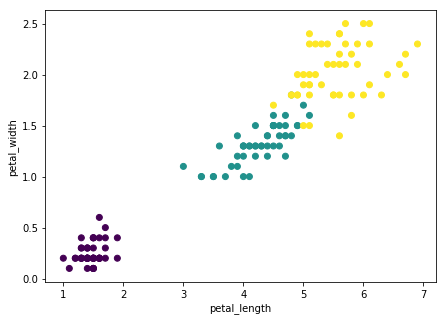

In [64]:
fig = plt.figure(figsize = (7, 5))

plt.scatter(data[data.columns[2]], data[data.columns[3]], c = data[data.columns[-1]])

plt.xlabel('petal_length')
plt.ylabel('petal_width')


In [69]:
x = data.iloc[:, 1:-1]
y = data.iloc[:, -1]


### by using KNN library 

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [122]:
# knn classification 

knn = KNeighborsClassifier(n_neighbors = 3)
# knn remembers data points in training set
knn.fit(x_train, y_train)

# prediction is to find the distance between testing data point and all the remembered training data,
# and find the closest k points
pred = knn.predict(x_test)

# evaluation 
knn.score(x_test, y_test)

0.96666666666666667

### tuning

In [123]:
# list of odd K for KNN
klist = list (range(1,50))
# subsetting the odd ones
neighbours = filter(lambda x: x / 2 != 0, klist)


cv_scores = []
for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors = k)
    # accuracy criteria 
    scores = cross_val_score(knn, x_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

optimal K is 4


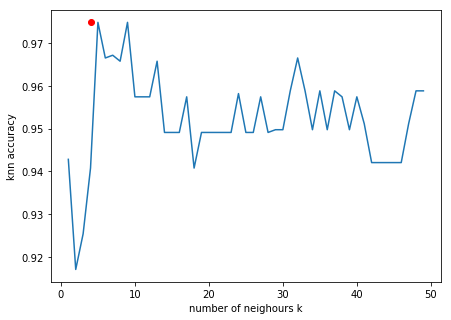

In [124]:
fig = plt.figure(figsize = (7, 5))

plt.plot(klist, cv_scores)
plt.plot(cv_scores.index(max(cv_scores)), max(cv_scores), color = 'r', marker = 'o')

plt.xlabel('number of neighours k')
plt.ylabel('knn accuracy')

print ('optimal K is {}'.format(cv_scores.index(max(cv_scores))))

optimal K is 4


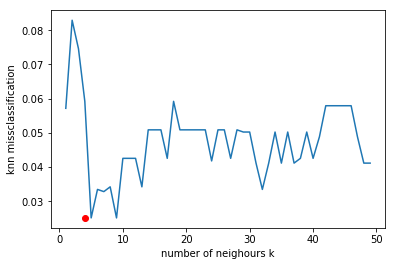

In [125]:
# change to missclassification metric

mse = [1 - x for x in cv_scores]

plt.plot(klist, mse)
plt.plot(mse.index(min(mse)), min(mse), color = 'r', marker = 'o')

plt.xlabel('number of neighours k')
plt.ylabel('knn missclassification')

print ('optimal K is {}'.format(mse.index(min(mse))))

### knn from scratch 

In [127]:
from collections import Counter

def predict(x_train, y_train, x_test, k):

    distances = []
    targets = []

    for i in range(len(x_train)):
        # compute the euclidean distance
        distance = np.sqrt(np.sum(np.square(x_test - x_train.iloc[i, :])))
        distances.append([distance, i])

    # sort the list
    distances = sorted(distances)

    # make a list of targets for KNN K
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train.iloc[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [129]:
# KNN

def kNearestNeighbor(x_train, y_train, x_test, predictions, k):
    for i in range(len(x_test)):
        predictions.append(predict(x_train, y_train, x_test.iloc[i, :], k))


In [130]:
# making predictions 
predictions = []

kNearestNeighbor(x_train, y_train, x_test, predictions, 7)

# prediction accuracy
np.sum(y_test == predictions)/ len(y_test)


0.96666666666666667